# Tabular Data

## Familiarizing ourselves with a library function using help()

In [1]:
import numpy
help(numpy.genfromtxt)

Help on function genfromtxt in module numpy:

genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=None, replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding='bytes')
    Load data from a text file, with missing values handled as specified.
    
    Each line past the first `skip_header` lines is split at the `delimiter`
    character, and characters following the `comments` character are discarded.
    
    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is `.gz` or `.bz2`, the file is first decompressed. Note
        that generators must return byte strings in Python 3k.  The strings
        in a 

In [2]:
ls data\data

 Volume in drive C is OS
 Volume Serial Number is 462F-9A94

 Directory of C:\Users\tkowalcz\Desktop\cms-workshop\data\data

08/06/2019  11:51 AM    <DIR>          .
08/06/2019  11:51 AM    <DIR>          ..
08/06/2019  11:51 AM               619 benzene.xyz
08/06/2019  11:51 AM             2,471 buckminsterfullerene.xyz
08/06/2019  11:51 AM           355,359 distance_data_headers.csv
08/06/2019  11:51 AM    <DIR>          outfiles
08/06/2019  11:51 AM            61,568 sapt.out
08/06/2019  11:51 AM               155 water.xyz
               5 File(s)        420,172 bytes
               3 Dir(s)  90,109,894,656 bytes free


In [3]:
import os
distance_file = os.path.join('data\data', 'distance_data_headers.csv')
distances = numpy.genfromtxt(fname=distance_file, delimiter=',', dtype='unicode')
print(distances)

[['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']
 ['1' '8.9542' '5.8024' '11.5478' '9.9557']
 ['2' '8.6181' '6.0942' '13.9594' '11.6945']
 ...
 ['9998' '8.6625' '7.7306' '9.5469' '10.3063']
 ['9999' '9.2456' '7.8886' '9.8151' '10.7564']
 ['10000' '8.8135' '7.917' '9.9517' '10.7848']]


In [4]:
# Extract the headers from the distance information
headers = distances[0]
print(headers)

['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']


In [32]:
# Now we'll extract the actual data with a proper slice
data = distances[1:]

In [34]:
# Remember that we imported these as type 'unicode', so they are strings.
# We need to convert these to floats before proceeding.
data = data.astype(numpy.float)
print(data)

[[1.00000e+00 8.95420e+00 5.80240e+00 1.15478e+01 9.95570e+00]
 [2.00000e+00 8.61810e+00 6.09420e+00 1.39594e+01 1.16945e+01]
 [3.00000e+00 9.00660e+00 6.06370e+00 1.30924e+01 1.13043e+01]
 ...
 [9.99800e+03 8.66250e+00 7.73060e+00 9.54690e+00 1.03063e+01]
 [9.99900e+03 9.24560e+00 7.88860e+00 9.81510e+00 1.07564e+01]
 [1.00000e+04 8.81350e+00 7.91700e+00 9.95170e+00 1.07848e+01]]


In [16]:
# Here is a subset of the data for testing
small_data = data[0:10,0:3]
print(small_data)

[[ 1.      8.9542  5.8024]
 [ 2.      8.6181  6.0942]
 [ 3.      9.0066  6.0637]
 [ 4.      9.2002  6.0227]
 [ 5.      9.1294  5.9365]
 [ 6.      9.0462  6.2553]
 [ 7.      8.8657  5.9186]
 [ 8.      9.3256  6.2351]
 [ 9.      9.4184  6.1993]
 [10.      9.06    6.0478]]


In [17]:
# Examples of slicing the small_data set to probe how slicing works
print(small_data[5,:])
print(small_data[:,1:])

[6.     9.0462 6.2553]
[[8.9542 5.8024]
 [8.6181 6.0942]
 [9.0066 6.0637]
 [9.2002 6.0227]
 [9.1294 5.9365]
 [9.0462 6.2553]
 [8.8657 5.9186]
 [9.3256 6.2351]
 [9.4184 6.1993]
 [9.06   6.0478]]


In [18]:
# Using numpy.mean() to compute the mean distance THR4_ATP
thr4_atp = data[:,1]  # Slices just the THR4_ATP column for all rows
avg_thr4_atp = numpy.mean(thr4_atp)
print(avg_thr4_atp)

10.876950930000001


In [19]:
# Determining the number of columns in the dataset (exluding timestep label)
ndatacol = len(data[1,:])
print(ndatacol)

5


In [20]:
for i in range(1,ndatacol):
    column = data[:,i]
    avg_col = numpy.mean(column)
    print(F'{headers[i]} : {avg_col}')

THR4_ATP : 10.876950930000001
THR4_ASP : 7.342344959999999
TYR6_ATP : 11.209791329999998
TYR6_ASP : 10.9934435


In [14]:
data = data.astype(numpy.float)

In [37]:
num_columns = len(data[0])
for i in range(1,num_columns):
    column = data[:,i]
    avg_col = numpy.mean(column)
    print(F'{headers[i]} : {avg_col}')

THR4_ATP : 10.876950930000001
THR4_ASP : 7.342344959999999
TYR6_ATP : 11.209791329999998
TYR6_ASP : 10.9934435


In [38]:
# Let's get graphing
import matplotlib.pyplot

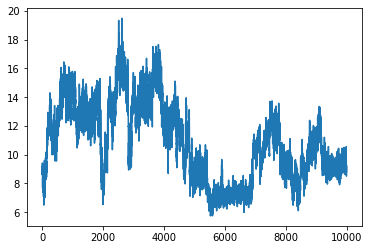

In [41]:
# Initialize a figure
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(data[:,1])

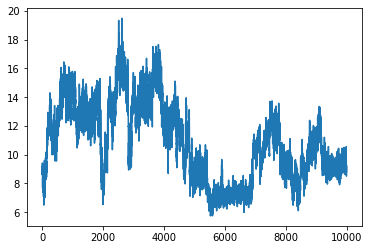

In [42]:
# Aliasing the pyplot module
import matplotlib.pyplot as plt
plt.figure()
plt.plot(data[:,1])

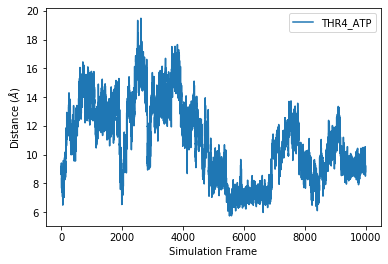

In [52]:
sample = headers[1]
plt.figure()
plt.xlabel('Simulation Frame')
plt.ylabel('Distance ($\AA$)')
plt.plot(data[:,1],label=sample)
plt.legend()
plt.savefig(F'{sample}.png',dpi=300)

In [51]:
ls

 Volume in drive C is OS
 Volume Serial Number is 462F-9A94

 Directory of C:\Users\tkowalcz\Desktop\cms-workshop

08/08/2019  04:34 PM    <DIR>          .
08/08/2019  04:34 PM    <DIR>          ..
08/08/2019  01:31 PM    <DIR>          .ipynb_checkpoints
08/06/2019  11:51 AM    <DIR>          data
08/06/2019  11:50 AM           191,618 data.zip
08/08/2019  04:34 PM            84,111 Draft of Lesson 4 - Tables.ipynb
08/08/2019  10:57 AM            11,939 MolSSI_TeachTheTeacher_Workshop.ipynb
08/08/2019  04:24 PM            65,608 Teach-the-Teacher Demo Sessions.ipynb
08/08/2019  04:34 PM            20,416 THR4_ATP.png
               5 File(s)        373,692 bytes
               4 Dir(s)  89,257,811,968 bytes free


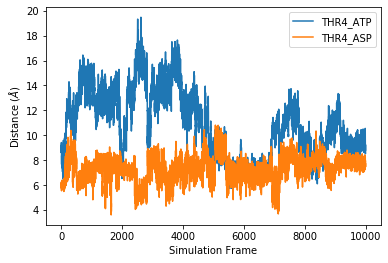

In [63]:
plt.figure()
plt.xlabel('Simulation Frame')
plt.ylabel('Distance ($\AA$)')
plt.plot(data[:,1],label=headers[1])
plt.plot(data[:,2],label=headers[2])
plt.legend()
#plt.savefig(F'{sample}.png',dpi=300)

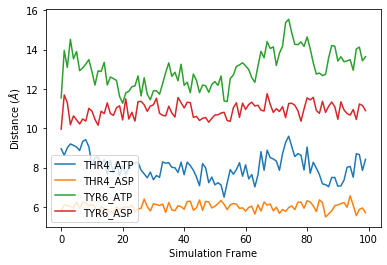

In [73]:
plt.figure()
plt.xlabel('Simulation Frame')
plt.ylabel('Distance ($\AA$)')
for i in range(1,len(data[0])):
    plt.plot(data[:100,i],label=headers[i])
    plt.legend(loc='lower left')
plt.savefig(F'distances.png',dpi=300)

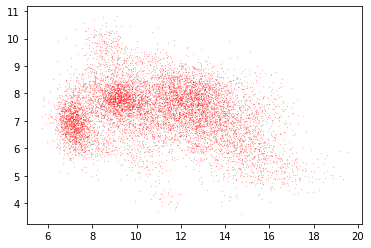

In [87]:
plt.figure()
plt.scatter(data[:,1],data[:,2],s=0.01,label=headers[1],c='red')

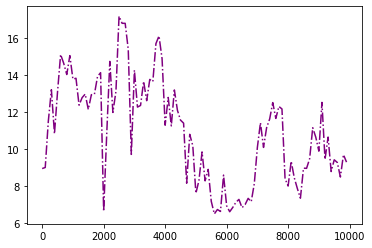

In [92]:
# You can plot every x'th line with some clever slicing
# Here we'll use a dash-dot line with the symbol '-.'
plt.plot(data[0::100,0],data[0::100,1],'-.',c='purple')